# LGBM

### 1. 패키지 불러오기

In [536]:
pip install lightgbm

In [537]:
import warnings # 경고창 무시
warnings.filterwarnings("ignore")
import time

from lightgbm import LGBMClassifier

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt # 데이터 시각화
import seaborn as sns # 통계적 데이터 시각화

from sklearn.datasets import make_classification

import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV



In [538]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [539]:
train=pd.read_csv("/content/gdrive/My Drive/Colab Notebooks/비어플 데이터/전처리 수정/train24.csv",index_col=[0])
test=pd.read_csv("/content/gdrive/My Drive/Colab Notebooks/비어플 데이터/전처리 수정/test24.csv",index_col=[0])
submission_1=pd.read_csv("/content/gdrive/My Drive/Colab Notebooks/비어플 데이터/전처리 수정/sample_submission.csv",index_col=[0])

In [540]:
print(train.dtypes)

age_group       int64
education       int64
engnat          int64
familysize      int64
gender          int64
hand            int64
married         int64
race            int64
religion        int64
urban           int64
voted           int64
wr_mean       float64
wf_mean       float64
Mach_score    float64
Tactic        float64
Views         float64
Morality      float64
Mach_3         object
Op            float64
Co            float64
Ex            float64
Ag            float64
Ne            float64
dtype: object


In [541]:
print(test.dtypes)

age_group       int64
education       int64
engnat          int64
familysize      int64
gender          int64
hand            int64
married         int64
race            int64
religion        int64
urban           int64
wr_mean       float64
wf_mean       float64
Mach_score    float64
Tactic        float64
Views         float64
Morality      float64
Mach_3         object
Op            float64
Co            float64
Ex            float64
Ag            float64
Ne            float64
dtype: object


In [542]:
train['education']=train['education'].astype('category')
train['age_group']=train['age_group'].astype('category')
train['engnat']=train['engnat'].astype('category')
train['gender']=train['gender'].astype('category')
train['hand']=train['hand'].astype('category')
train['married']=train['married'].astype('category')
train['race']=train['race'].astype('category')
train['religion']=train['religion'].astype('category')
train['urban']=train['urban'].astype('category')
train['Mach_3']=train['Mach_3'].astype('category')
train['voted']=train['voted'].astype('category')


test['education']=test['education'].astype('category')
test['age_group']=test['age_group'].astype('category')
test['engnat']=test['engnat'].astype('category')
test['gender']=test['gender'].astype('category')
test['hand']=test['hand'].astype('category')
test['married']=test['married'].astype('category')
test['race']=test['race'].astype('category')
test['religion']=test['religion'].astype('category')
test['urban']=test['urban'].astype('category')
test['Mach_3']=test['Mach_3'].astype('category')


In [543]:
print(train.dtypes)

age_group     category
education     category
engnat        category
familysize       int64
gender        category
hand          category
married       category
race          category
religion      category
urban         category
voted         category
wr_mean        float64
wf_mean        float64
Mach_score     float64
Tactic         float64
Views          float64
Morality       float64
Mach_3        category
Op             float64
Co             float64
Ex             float64
Ag             float64
Ne             float64
dtype: object


In [544]:
print(test.dtypes)

age_group     category
education     category
engnat        category
familysize       int64
gender        category
hand          category
married       category
race          category
religion      category
urban         category
wr_mean        float64
wf_mean        float64
Mach_score     float64
Tactic         float64
Views          float64
Morality       float64
Mach_3        category
Op             float64
Co             float64
Ex             float64
Ag             float64
Ne             float64
dtype: object


In [545]:
X_train = train.drop(['voted'],axis=1)
y_train = train['voted']

In [546]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=1234)

In [547]:
X_train

,age_group,education,engnat,familysize,gender,hand,married,race,religion,urban,wr_mean,wf_mean,Mach_score,Tactic,Views,Morality,Mach_3,Op,Co,Ex,Ag,Ne
33641,1,1,1,1,1,1,1,2,12,2,0.538462,0.000000,3.00,3.333333,3.111111,1.0,mediumM,7.0,4.5,3.5,4.5,2.0
7224,1,2,1,3,1,1,1,2,12,3,0.846154,0.333333,2.25,2.555556,2.111111,1.5,lowM,6.0,6.5,3.5,4.5,5.0
16763,5,2,1,2,2,1,3,2,7,1,0.846154,0.000000,2.45,2.444444,2.777778,1.0,mediumM,6.5,7.0,5.0,4.5,3.0
38255,1,1,1,2,2,1,1,2,2,3,0.615385,0.000000,3.90,4.111111,4.111111,2.0,HighM,4.0,4.0,2.5,2.5,4.5
13332,2,4,2,3,1,1,1,1,4,3,0.692308,0.000000,4.50,4.333333,4.666667,4.5,HighM,4.0,3.5,3.0,3.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32400,3,4,2,3,1,1,2,2,2,2,0.846154,0.333333,4.00,4.222222,3.777778,4.0,HighM,4.5,2.5,5.5,3.5,2.0
17049,2,2,1,3,2,1,1,2,12,3,0.615385,0.000000,3.40,3.444444,3.777778,1.5,mediumM,2.5,7.0,3.0,2.0,4.0
23925,2,4,2,3,1,1,1,2,2,3,0.769231,0.333333,4.85,4.888889,4.777778,5.0,HighM,4.5,1.5,4.0,2.0,2.0
34087,2,2,2,1,2,1,1,3,1,3,0.615385,0.000000,4.30,4.444444,4.111111,4.5,HighM,7.0,5.0,4.5,3.0,1.0


In [548]:
y_train

33641    2
7224     2
16763    1
38255    2
13332    2
        ..
32400    2
17049    1
23925    1
34087    2
27440    2
Name: voted, Length: 36105, dtype: category
Categories (2, int64): [1, 2]

In [549]:
X_valid

,age_group,education,engnat,familysize,gender,hand,married,race,religion,urban,wr_mean,wf_mean,Mach_score,Tactic,Views,Morality,Mach_3,Op,Co,Ex,Ag,Ne
36381,2,2,2,0,2,1,1,2,7,3,0.692308,0.000000,4.15,4.333333,4.222222,3.0,HighM,2.0,3.5,1.0,4.0,3.5
10521,2,3,1,4,1,2,2,2,7,1,0.769231,0.000000,2.95,3.111111,3.111111,1.5,mediumM,5.5,6.0,4.0,6.5,4.5
12210,2,3,1,2,2,1,1,2,5,2,0.769231,0.333333,4.00,4.333333,3.555556,4.5,HighM,4.5,5.5,5.5,4.0,3.5
4861,2,4,1,1,1,1,1,3,2,2,1.000000,0.000000,2.15,2.222222,2.000000,2.5,lowM,7.0,6.0,3.5,4.5,5.0
43892,3,3,1,3,1,1,1,2,4,1,0.769231,0.000000,2.75,2.555556,3.222222,1.5,mediumM,2.5,5.0,4.5,5.0,5.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39909,1,1,1,4,1,1,1,2,9,2,0.538462,0.000000,3.50,3.333333,3.777778,3.0,mediumM,4.0,6.5,6.5,5.0,5.0
42821,6,4,1,2,2,1,2,1,8,3,0.846154,0.333333,2.10,2.555556,1.888889,1.0,lowM,6.5,7.0,7.0,6.0,7.0
5503,1,1,2,2,2,1,1,1,2,3,0.846154,0.333333,4.50,4.777778,4.111111,5.0,HighM,7.0,2.0,1.0,1.5,7.0
21107,3,2,2,0,2,1,1,1,7,2,0.769231,0.000000,4.10,4.111111,4.333333,3.0,HighM,6.5,4.0,5.5,2.5,3.0


In [550]:
y_valid

36381    2
10521    1
12210    1
4861     1
43892    1
        ..
39909    2
42821    1
5503     2
21107    2
1713     1
Name: voted, Length: 9027, dtype: category
Categories (2, int64): [1, 2]

### 3. LGBM 모델 생성

In [551]:
#파라미터 적용
fit_lgbm = lgb.LGBMClassifier(boosting_type='gbdt',
                          num_leaves=70,
                          max_depth=8,
                          learning_rate=0.1,
                          n_estimators=100,
                          subsample_for_bin=200000,
                          objective='binary', #default=None
                          metric='binary_logloss',
                          class_weight=None,
                          min_split_gain=0,
                          min_child_weight=1e-3,
                          min_child_samples=20,
                          subsample=1,
                          subsample_freq=0,
                          colsample_bytree=1,
                          reg_alpha=0,
                          reg_lambda=0,
                          random_state=None,
                          n_jobs=-1,
                          silent=True,
                          importance_type='split'
                         )


In [552]:
model = fit_lgbm.fit(X_train, y_train, eval_set=[(X_valid, y_valid)], early_stopping_rounds=500, verbose=True,eval_metric='auc')


[1]	valid_0's auc: 0.815874	valid_0's binary_logloss: 0.639807
Training until validation scores don't improve for 500 rounds.
[2]	valid_0's auc: 0.821135	valid_0's binary_logloss: 0.612684
[3]	valid_0's auc: 0.822141	valid_0's binary_logloss: 0.590216
[4]	valid_0's auc: 0.823076	valid_0's binary_logloss: 0.571289
[5]	valid_0's auc: 0.82421	valid_0's binary_logloss: 0.555107
[6]	valid_0's auc: 0.824845	valid_0's binary_logloss: 0.541463
[7]	valid_0's auc: 0.824969	valid_0's binary_logloss: 0.529667
[8]	valid_0's auc: 0.824381	valid_0's binary_logloss: 0.51973
[9]	valid_0's auc: 0.824855	valid_0's binary_logloss: 0.510987
[10]	valid_0's auc: 0.82565	valid_0's binary_logloss: 0.503211
[11]	valid_0's auc: 0.825807	valid_0's binary_logloss: 0.49668
[12]	valid_0's auc: 0.826667	valid_0's binary_logloss: 0.490783
[13]	valid_0's auc: 0.826931	valid_0's binary_logloss: 0.485672
[14]	valid_0's auc: 0.826712	valid_0's binary_logloss: 0.481476
[15]	valid_0's auc: 0.826591	valid_0's binary_logloss:

+ 정확도, 과적합 확인

In [553]:
y_pred=fit_lgbm.predict(X_valid)
accuracy=accuracy_score(y_pred, y_valid)
# 정확도 확인
print('LightGBM Model accuracy score: {0:0.4f}'.format(accuracy_score(y_valid, y_pred)))
# 과적합 확인
print('Train set score: {:.4f}'.format(fit_lgbm.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(fit_lgbm.score(X_valid, y_valid)))

LightGBM Model accuracy score: 0.7393
Train set score: 0.7718
Test set score: 0.7393


+ 오차 행렬 (Confusion matrix)

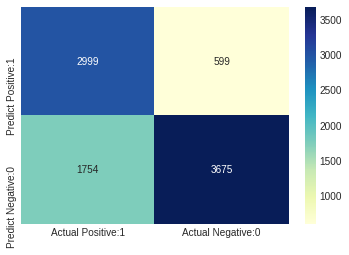

In [554]:
cm = confusion_matrix(y_valid, y_pred)
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

+ 분류 리포트  
<br>
+ 정확도: 정확히 예측한 수를 전체 샘플 수로 나눈 것
<br>
+ 정밀도(precision): 양성으로 예측된 것 중 얼마나 많은 샘플이 진짜 양성인지를 측정
+ 재현율(recall): 전체 양성 샘플 중에서 얼마나 많은 샘플이 양성 클래스로 분류되는지를 측정
+ f1-점수(f1-score): 정밀도와 재현율의 조화 평균으로, 이 둘을 하나로 요약  
<br> 
+ 분류 리포트의 마지막 세 줄은 정밀도, 재현율, f1-점수의 평균
    + macro avg는 단순히 클래스별 점수의 평균
    + weighted avg는 클래스의 샘플 수로 가중평균

In [555]:
print(classification_report(y_valid, y_pred))

              precision    recall  f1-score   support

           1       0.63      0.83      0.72      3598
           2       0.86      0.68      0.76      5429

    accuracy                           0.74      9027
   macro avg       0.75      0.76      0.74      9027
weighted avg       0.77      0.74      0.74      9027



In [556]:
train_x = train.drop('voted',axis=1)
train_y = train['voted']

In [557]:
#파라미터 적용
fit_lgbm = lgb.LGBMClassifier(boosting_type='gbdt',
                          num_leaves=31,
                          max_depth=10,
                          learning_rate=0.1,
                          n_estimators=1000,
                          subsample_for_bin=200000,
                          objective='binary', #default=None
                          metric='binary_logloss',
                          class_weight=None,
                          min_split_gain=0,
                          min_child_weight=1e-3,
                          min_child_samples=20,
                          subsample=1,
                          subsample_freq=0,
                          colsample_bytree=1,
                          reg_alpha=0,
                          reg_lambda=0,
                          random_state=None,
                          n_jobs=-1,
                          silent=True,
                          importance_type='split'
                         )


In [558]:
model = fit_lgbm.fit(X_train, y_train, eval_set=[(X_valid, y_valid)], early_stopping_rounds=500, verbose=True,eval_metric='auc')


[1]	valid_0's auc: 0.818201	valid_0's binary_logloss: 0.639975
Training until validation scores don't improve for 500 rounds.
[2]	valid_0's auc: 0.820264	valid_0's binary_logloss: 0.613152
[3]	valid_0's auc: 0.82111	valid_0's binary_logloss: 0.590812
[4]	valid_0's auc: 0.822791	valid_0's binary_logloss: 0.57184
[5]	valid_0's auc: 0.824388	valid_0's binary_logloss: 0.555702
[6]	valid_0's auc: 0.824339	valid_0's binary_logloss: 0.542161
[7]	valid_0's auc: 0.824815	valid_0's binary_logloss: 0.530355
[8]	valid_0's auc: 0.825129	valid_0's binary_logloss: 0.520341
[9]	valid_0's auc: 0.825322	valid_0's binary_logloss: 0.511544
[10]	valid_0's auc: 0.825865	valid_0's binary_logloss: 0.503982
[11]	valid_0's auc: 0.826705	valid_0's binary_logloss: 0.497241
[12]	valid_0's auc: 0.826886	valid_0's binary_logloss: 0.49142
[13]	valid_0's auc: 0.827258	valid_0's binary_logloss: 0.486256
[14]	valid_0's auc: 0.827387	valid_0's binary_logloss: 0.481862
[15]	valid_0's auc: 0.827653	valid_0's binary_logloss

In [559]:
pred_y = fit_lgbm.predict(test)

In [560]:
pred_y

array([2, 2, 2, ..., 2, 2, 2])

In [561]:
submission_1['voted']=pred_y

In [562]:
submission_1

,voted
index,
0,2
1,2
2,2
3,1
4,2
...,...
11378,2
11379,2
11380,2


# XGBoost

In [563]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [564]:
from sklearn.datasets import load_iris, load_wine, load_breast_cancer
from sklearn.datasets import load_boston, load_diabetes
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.preprocessing import LabelEncoder, StandardScaler

import xgboost as xgb
from xgboost import plot_importance, plot_tree

import graphviz
import matplotlib.pyplot as plt
plt.style.use(['seaborn-whitegrid'])

import pandas as pd
import numpy as np
from imblearn.over_sampling import RandomOverSampler

In [565]:
train=pd.read_csv("/content/gdrive/My Drive/Colab Notebooks/비어플 데이터/전처리 수정/train20.csv",index_col=[0])
test=pd.read_csv("/content/gdrive/My Drive/Colab Notebooks/비어플 데이터/전처리 수정/test20.csv",index_col=[0])
submission_2=pd.read_csv("/content/gdrive/My Drive/Colab Notebooks/비어플 데이터/전처리 수정/sample_submission.csv",index_col=[0])

In [566]:
train.head()

,age_group,education,engnat,familysize,gender,hand,married,race,religion,urban,voted,wr_mean,wf_mean,Mach_score,Tactic,Views,Morality,Mach_3,Op,Co,Ex,Ag,Ne
1,1,1,1,3,2,1,1,3,1,3,2,0.461538,0.000000,3.0,3.222222,3.222222,1.0,mediumM,5.5,3.0,2.0,3.5,4.0
2,1,1,2,9,1,3,1,3,10,2,2,0.153846,0.000000,3.0,3.222222,3.222222,1.0,mediumM,4.0,4.0,4.0,4.0,4.0
3,1,2,1,3,2,1,1,2,4,3,2,1.000000,1.000000,3.0,3.222222,3.222222,1.0,mediumM,4.0,4.0,4.0,4.0,4.0
4,1,1,1,1,1,3,1,3,7,3,2,0.538462,0.333333,3.0,2.777778,2.777778,5.0,mediumM,4.0,4.0,4.0,4.0,4.0
5,1,2,1,4,2,1,1,2,7,1,2,0.384615,0.666667,3.0,3.000000,3.000000,3.0,mediumM,4.0,4.0,4.0,4.0,4.0


In [567]:
test.head()

,age_group,education,engnat,familysize,gender,hand,married,race,religion,urban,wr_mean,wf_mean,Mach_score,Tactic,Views,Morality,Mach_3,Op,Co,Ex,Ag,Ne,voted
1,1,2,2,3,2,1,1,2,5,2,0.461538,0.0,2.45,2.000000,3.111111,1.5,mediumM,5.5,5.0,4.0,3.5,4.0,NaN
2,1,2,2,2,2,2,1,3,4,3,0.000000,0.0,2.80,3.555556,2.444444,1.0,mediumM,4.0,4.0,4.0,4.0,4.0,NaN
3,3,3,2,7,2,1,2,3,7,1,0.538462,0.0,3.55,4.111111,3.111111,3.0,mediumM,1.5,3.5,1.5,4.0,2.0,NaN
4,6,4,1,4,2,1,2,2,4,2,1.000000,0.0,3.35,4.111111,2.444444,4.0,mediumM,7.0,6.0,7.0,6.5,6.5,NaN
5,1,2,1,3,2,1,1,2,1,2,0.769231,0.0,2.90,3.000000,2.888889,2.5,mediumM,4.0,4.0,1.0,2.0,3.0,NaN


In [568]:
train['voted']=train['voted']-1

In [569]:
train['Mach_3'][train['Mach_3']=='mediumM']=2.0
train['Mach_3'][train['Mach_3']=='lowM']=1.0
train['Mach_3'][train['Mach_3']=='HighM']=3.0

test['Mach_3'][test['Mach_3']=='mediumM']=2.0
test['Mach_3'][test['Mach_3']=='lowM']=1.0
test['Mach_3'][test['Mach_3']=='HighM']=3.0

In [570]:
print(train['Mach_3'])
print(test['Mach_3'])


1        2
2        2
3        2
4        2
5        2
        ..
45128    3
45129    2
45130    3
45131    3
45132    2
Name: Mach_3, Length: 45132, dtype: object
1        2
2        2
3        2
4        2
5        2
        ..
11379    2
11380    2
11381    2
11382    2
11383    3
Name: Mach_3, Length: 11383, dtype: object


In [571]:
train['age_group']=train['age_group'].astype('category')
train['education']=train['education'].astype('category')
train['engnat']=train['engnat'].astype('category')
train['familysize']=train['familysize'].astype('category')
train['married']=train['married'].astype('category')
train['race']=train['race'].astype('category')
train['religion']=train['religion'].astype('category')
train['gender']=train['gender'].astype('category')
train['hand']=train['hand'].astype('category')
train['urban']=train['urban'].astype('category')
train['voted']=train['voted'].astype('category')
train['Mach_3']=train['Mach_3'].astype('category')

In [572]:
test['age_group']=test['age_group'].astype('category')
test['education']=test['education'].astype('category')
test['engnat']=test['engnat'].astype('category')
test['familysize']=test['familysize'].astype('category')
test['married']=test['married'].astype('category')
test['race']=test['race'].astype('category')
test['religion']=test['religion'].astype('category')
test['gender']=test['gender'].astype('category')
test['hand']=test['hand'].astype('category')
test['urban']=test['urban'].astype('category')
test['Mach_3']=test['Mach_3'].astype('category')
del test['voted']

In [573]:
train.head()

,age_group,education,engnat,familysize,gender,hand,married,race,religion,urban,voted,wr_mean,wf_mean,Mach_score,Tactic,Views,Morality,Mach_3,Op,Co,Ex,Ag,Ne
1,1,1,1,3,2,1,1,3,1,3,1,0.461538,0.000000,3.0,3.222222,3.222222,1.0,2.0,5.5,3.0,2.0,3.5,4.0
2,1,1,2,9,1,3,1,3,10,2,1,0.153846,0.000000,3.0,3.222222,3.222222,1.0,2.0,4.0,4.0,4.0,4.0,4.0
3,1,2,1,3,2,1,1,2,4,3,1,1.000000,1.000000,3.0,3.222222,3.222222,1.0,2.0,4.0,4.0,4.0,4.0,4.0
4,1,1,1,1,1,3,1,3,7,3,1,0.538462,0.333333,3.0,2.777778,2.777778,5.0,2.0,4.0,4.0,4.0,4.0,4.0
5,1,2,1,4,2,1,1,2,7,1,1,0.384615,0.666667,3.0,3.000000,3.000000,3.0,2.0,4.0,4.0,4.0,4.0,4.0


In [574]:
test.head()

,age_group,education,engnat,familysize,gender,hand,married,race,religion,urban,wr_mean,wf_mean,Mach_score,Tactic,Views,Morality,Mach_3,Op,Co,Ex,Ag,Ne
1,1,2,2,3,2,1,1,2,5,2,0.461538,0.0,2.45,2.000000,3.111111,1.5,2.0,5.5,5.0,4.0,3.5,4.0
2,1,2,2,2,2,2,1,3,4,3,0.000000,0.0,2.80,3.555556,2.444444,1.0,2.0,4.0,4.0,4.0,4.0,4.0
3,3,3,2,7,2,1,2,3,7,1,0.538462,0.0,3.55,4.111111,3.111111,3.0,2.0,1.5,3.5,1.5,4.0,2.0
4,6,4,1,4,2,1,2,2,4,2,1.000000,0.0,3.35,4.111111,2.444444,4.0,2.0,7.0,6.0,7.0,6.5,6.5
5,1,2,1,3,2,1,1,2,1,2,0.769231,0.0,2.90,3.000000,2.888889,2.5,2.0,4.0,4.0,1.0,2.0,3.0


In [575]:
data_val = train.drop('voted',axis=1).values
data_vot = train['voted'].values
X_train, X_test, y_train, y_test = train_test_split(data_val, data_vot, random_state=123, test_size=0.2)
d_train = xgb.DMatrix(data=X_train, label=y_train)
d_valid = xgb.DMatrix(data=X_test, label=y_test)
d_test = xgb.DMatrix(test.values)


In [576]:
params = {
        'objective':'binary:logistic',
        'max_depth':8,
        'learning_rate':0.1, 
        'eval_metric':'auc',
        'min_child_weight':8,
        'subsample':0.8,
        'colsample_bytree':0.8,
        'seed':29,
#         'reg_lambda':1,
        'reg_alpha':0,
        'gamma':1,
        'scale_pos_weight':1,
        'n_estimators': 100,
        'nthread':-1
}


In [577]:
watchlist = [(d_train, 'train'), (d_valid, 'valid')]
nrounds=10000  
model_xgb = xgb.train(params, d_train, nrounds, watchlist, early_stopping_rounds=50, 
                           maximize=True, verbose_eval=10)

[0]	train-auc:0.831802	valid-auc:0.816255
Multiple eval metrics have been passed: 'valid-auc' will be used for early stopping.

Will train until valid-auc hasn't improved in 50 rounds.
[10]	train-auc:0.853413	valid-auc:0.823256
[20]	train-auc:0.862023	valid-auc:0.824633
[30]	train-auc:0.868044	valid-auc:0.823963
[40]	train-auc:0.875673	valid-auc:0.824503
[50]	train-auc:0.882321	valid-auc:0.824682
[60]	train-auc:0.889773	valid-auc:0.824999
[70]	train-auc:0.895807	valid-auc:0.824458
[80]	train-auc:0.900531	valid-auc:0.823477
[90]	train-auc:0.908204	valid-auc:0.821619
[100]	train-auc:0.915815	valid-auc:0.820971
Stopping. Best iteration:
[57]	train-auc:0.887224	valid-auc:0.825249



In [578]:
#valid 성능평가
pred_probs = model_xgb.predict(d_valid)

preds = [ 1 if x > 0.5 else 0 for x in pred_probs]
print('예측값 10개만 표시: ', preds[:10])

예측값 10개만 표시:  [0, 1, 1, 0, 1, 1, 0, 0, 0, 0]


In [579]:
print("정확도: {}".format(accuracy_score(y_test, preds)))
print("정밀도: {}".format(precision_score(y_test, preds)))
print("재현율: {}".format(recall_score(y_test, preds)))

정확도: 0.7364572947823197
정밀도: 0.842701722574796
재현율: 0.6881362206181751


In [580]:
preds = model_xgb.predict(d_test)

In [581]:
pred1 = list()

for i in range(len(preds)):
    pred1.append(preds[i] + 1)
print(pred1)

[1.9989437460899353, 1.9992256164550781, 1.681876003742218, 1.1209056451916695, 1.999370276927948, 1.3386437594890594, 1.999478280544281, 1.743567705154419, 1.3125383853912354, 1.544623076915741, 1.341040849685669, 1.3858580589294434, 1.5203049182891846, 1.9993959665298462, 1.9989421963691711, 1.2602341175079346, 1.4947094917297363, 1.5510718822479248, 1.2978889644145966, 1.2893418967723846, 1.2043815404176712, 1.309282898902893, 1.9989873766899109, 1.2851165533065796, 1.9994441866874695, 1.5797613859176636, 1.3128341436386108, 1.1328540444374084, 1.4418102204799652, 1.998856544494629, 1.2765991985797882, 1.6365638375282288, 1.1837875843048096, 1.309689700603485, 1.4181364476680756, 1.3917329609394073, 1.1971638649702072, 1.362128734588623, 1.9993374943733215, 1.9989857077598572, 1.7089188694953918, 1.999565303325653, 1.3247945308685303, 1.9991674423217773, 1.9994207620620728, 1.4669679701328278, 1.999078631401062, 1.2553586959838867, 1.999487042427063, 1.650675356388092, 1.99896192550

In [582]:
submission_2['voted'] = pred1

In [583]:
submission_2

,voted
index,
0,1.998944
1,1.999226
2,1.681876
3,1.120906
4,1.999370
...,...
11378,1.999036
11379,1.999030
11380,1.999220


In [584]:
submission_2.to_excel(excel_writer="/content/gdrive/My Drive/Colab Notebooks/비어플 데이터/전처리 수정/sample_submission.xlsx")

In [585]:
sum(submission_2['voted'])

18198.72623906657

# 가중치 부여

In [586]:
submission = submission_1*0.7+submission_2*0.3

In [587]:
submission=round(submission)
submission

,voted
index,
0,2.0
1,2.0
2,2.0
3,1.0
4,2.0
...,...
11378,2.0
11379,2.0
11380,2.0


In [588]:
submission.to_excel(excel_writer="/content/gdrive/My Drive/Colab Notebooks/비어플 데이터/전처리 수정/sample_submission.xlsx")